## Dataset and motivation slide
- How/why dataset was collected and describe the meta data of your dataset.

## Actual task definition/Research Question
- What real-world problem you trying to solve. **What is input and output of your analysis.**

## Literature review
- What other work has been done in this area and how is your work novel compared to others.

## Quality of cleaning
- Data Cleaning and type conversion activity. Anything unusual you faced during this activity. Please share.
- What you did about missing values and why?
- Data summary statistics and interpretation.

## Visualization
- Data Visualization activity(box plot, bar plot, violin plot, pairplot to see relationship and distribution etc).
- Describe any thing you find in the data after each visualization.
- What data visualization help you understanding data distribution.
- What did you do about possible outlier as per data distribution visualization. (Did you confirm it with your client if it is actually an outlier or put a disclosure statement in notebook if you decided to remove it.)

In [235]:
import pandas as pd
import numpy as np
indivs92_df = pd.read_pickle('/Users/gameonsammy/Documents/DU/Data_Tools/analysis_of_crp_data/data/CampaignFin92/indivs92.pkl')
indivs96_df = pd.read_pickle('/Users/gameonsammy/Documents/DU/Data_Tools/analysis_of_crp_data/data/CampaignFin96/indivs96.pkl')
indivs00_df = pd.read_pickle('/Users/gameonsammy/Documents/DU/Data_Tools/analysis_of_crp_data/data/CampaignFin00/indivs00.pkl')
indivs04_df = pd.read_pickle('/Users/gameonsammy/Documents/DU/Data_Tools/analysis_of_crp_data/data/CampaignFin04/indivs04.pkl')
indivs08_df = pd.read_pickle('/Users/gameonsammy/Documents/DU/Data_Tools/analysis_of_crp_data/data/CampaignFin08/indivs08.pkl')
indivs12_df = pd.read_pickle('/Users/gameonsammy/Documents/DU/Data_Tools/analysis_of_crp_data/data/CampaignFin12/indivs12.pkl')

# create a dataframe of all the individuals data 
frames = [indivs92_df,indivs96_df,indivs00_df,indivs04_df,indivs08_df,indivs12_df]
indivs_df = pd.concat(frames,ignore_index=True)

# change the dtype from object to integer of Amount 
indivs_df['Amount'] = indivs_df['Amount'].apply(lambda x: int(x))

# group the dataframe by Cycle
cycle_df = indivs_df.groupby('Cycle')


In [236]:
def group_years(i):
    '''Extracts total amount of contributions from each year. Returns the year, total amount, and 
    number of contributions'''
    
    year = i
    amount = cycle_df.get_group(i).Amount.sum()
    contrib = len(cycle_df.get_group(i))
   
    return [[year,amount,contrib]]

In [237]:
# goes through each of the years to create the total sum dataframe
total_df = pd.DataFrame(columns=['Year','Total_Amount','Total_Contributions'])
years = ['1992','1996','2000','2004','2008','2012']
for i in years:
    total_df = total_df.append(pd.DataFrame(group_years(i),columns=['Year','Total_Amount','Total_Contributions']))

# change datatype of total_contrib and reindex dataframe
total_df.Total_Contributions = total_df.Total_Contributions.astype(int)
total_df = total_df.reset_index(drop=True)
total_df

,Year,Total_Amount,Total_Contributions
0,1992,7113570,10898
1,1996,13774660,18728
2,2000,21976086,22284
3,2004,39929759,49145
4,2008,72180357,79315
5,2012,82503809,80692


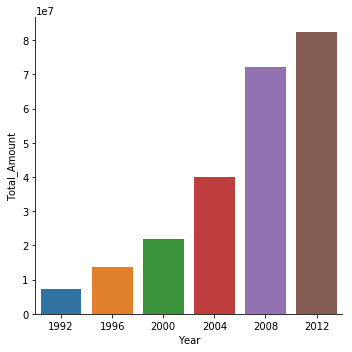

In [238]:
import seaborn as sns
sns.catplot(x='Year', y='Total_Amount', kind="bar", data=total_df)
# put amount and contrib side-by-side